Shows the process of cleaning/combining data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sympy import S, symbols
from scipy import stats
import seaborn as sns

%matplotlib inline

## GDP v. Population, all Data

Remove the extra explanation at the beginning of the csv before loading here.

In [2]:
population = pd.read_csv("API_SP.POP.1564.TO.ZS_DS2_en_csv_v2.csv")

In [3]:
population = population[["Country Code","2016"]]

In [4]:
population.columns = ["Country Code", "Population Ages 15-64 (% of Total)"]

In [5]:
gdp = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv")
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,47712.299081,43215.687013,39627.663516,40919.183279,38167.095746,40215.435317,NaN,NaN,NaN,NaN


In [6]:
gdp = gdp[["Country Code", "2016"]]
gdp.columns = ["Country Code", "GDP Per Capita (Current US Dollars)"]

In [7]:
gdp.head()

,Country Code,GDP Per Capita (Current US Dollars)
0,ABW,NaN
1,AFG,561.778746
2,AGO,3110.808183
3,ALB,4146.896250
4,AND,NaN


In [8]:
merged = gdp.merge(population, on="Country Code")
merged = merged.dropna(how="any")

In [9]:
merged.head()

,Country Code,GDP Per Capita (Current US Dollars),Population Ages 15-64 (% of Total)
1,AFG,561.778746,53.598917
2,AGO,3110.808183,50.690863
3,ALB,4146.896250,69.443689
5,ARB,6153.069547,62.385144
6,ARE,37622.207458,85.028100


In [10]:
x = merged["GDP Per Capita (Current US Dollars)"]
y = merged["Population Ages 15-64 (% of Total)"]

In [11]:
x.describe()

count       218.000000
mean      12436.230795
std       17347.504280
min         285.727442
25%        1639.712259
50%        5195.249607
75%       14036.779444
max      102831.321483
Name: GDP Per Capita (Current US Dollars), dtype: float64

In [12]:
y.describe()

count    218.000000
mean      63.552449
std        6.472207
min       47.219093
25%       59.497010
50%       65.110949
75%       67.512170
max       85.028100
Name: Population Ages 15-64 (% of Total), dtype: float64

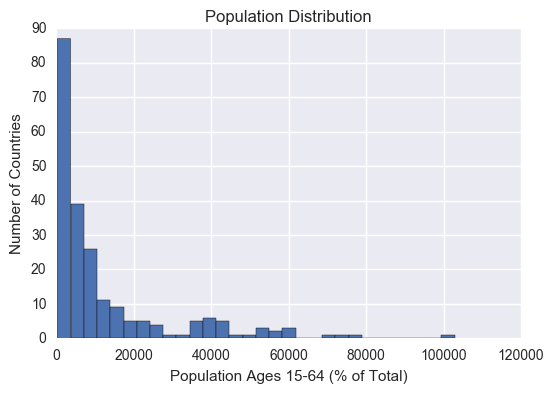

In [13]:
plt.hist(x,bins=30)
plt.title("Population Distribution")
plt.xlabel("Population Ages 15-64 (% of Total)")
plt.ylabel("Number of Countries")
plt.savefig("population_hist.png", bbox_inches='tight')
plt.show()

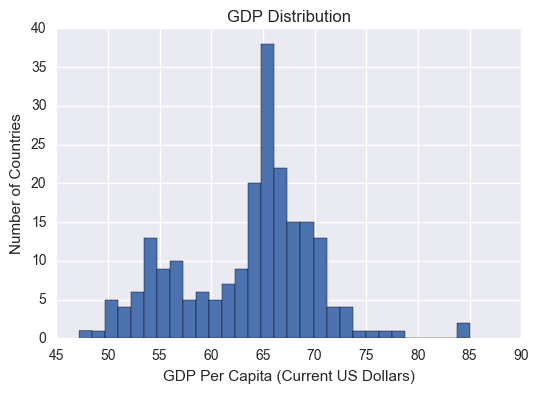

In [14]:
plt.hist(y,bins=30)
plt.xlabel("GDP Per Capita (Current US Dollars)")
plt.ylabel("Number of Countries")
plt.title("GDP Distribution")
plt.savefig("gdp_hist.png", bbox_inches='tight')
plt.show()

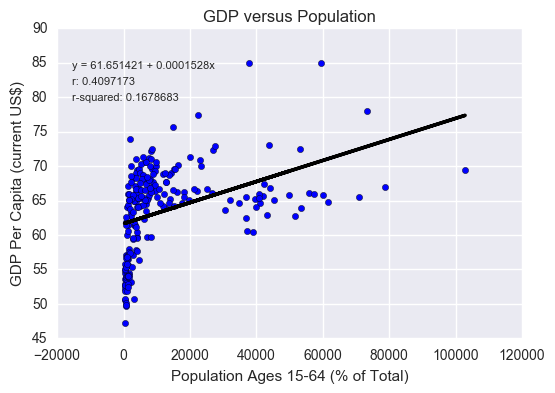

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
a, b = np.polyfit(x,y, deg=1)
f = lambda x: slope * x + intercept
plt.scatter(x,y)
plt.plot(x,f(x),lw=2.5,c="k")
plt.title("GDP versus Population")
plt.xlabel("Population Ages 15-64 (% of Total)")
plt.ylabel("GDP Per Capita (current US$)")
plt.text(0.15, 0.8, "y = " + str(intercept)[0:9] + " + " + str(slope)[0:9] + "x", fontsize=8, transform=plt.gcf().transFigure)
plt.text(0.15,0.76, "r: " + str(r_value)[0:9],fontsize=8, transform=plt.gcf().transFigure)
plt.text(0.15,0.72, "r-squared: " + str(r_value * r_value)[0:9],fontsize=8, transform=plt.gcf().transFigure)
plt.savefig("gdp_population_teens.png",bbox_inches='tight')
plt.show()


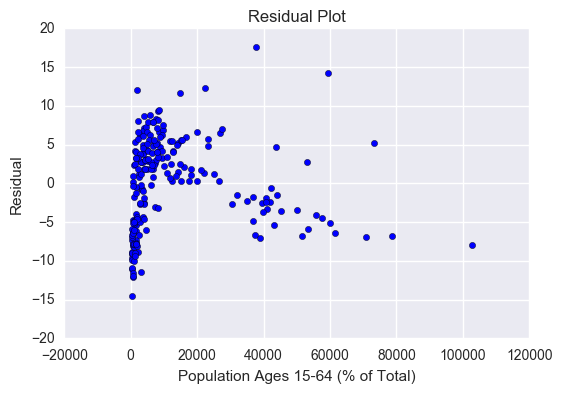

In [16]:
resid = y - f(x)
plt.scatter(x,resid)
plt.xlabel("Population Ages 15-64 (% of Total)")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.savefig("gdp_population_teens_resid.png",bbox_inches='tight')
plt.show()

## GDP < 5000

In [17]:
gdp5000 = merged[x < 5000]
print(gdp5000.shape)

(108, 3)


In [18]:
x = gdp5000["Population Ages 15-64 (% of Total)"]
y = gdp5000["GDP Per Capita (Current US Dollars)"]

In [19]:
x.describe()

count    108.000000
mean      59.579922
std        6.056585
min       47.219093
25%       54.188082
50%       58.700875
75%       65.009360
max       73.956894
Name: Population Ages 15-64 (% of Total), dtype: float64

In [20]:
y.describe()

count     108.000000
mean     2087.315161
std      1410.029704
min       285.727442
25%       845.093583
50%      1583.978545
75%      3309.165911
max      4989.254611
Name: GDP Per Capita (Current US Dollars), dtype: float64

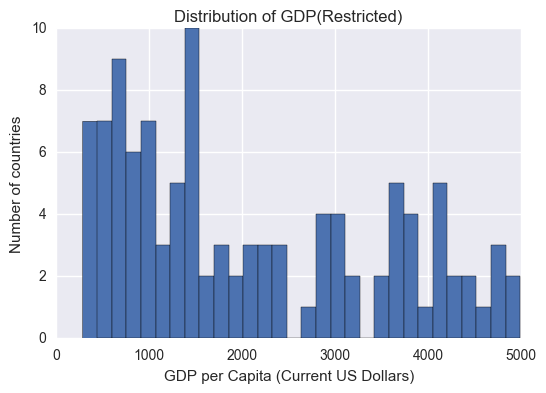

In [21]:
plt.hist(y,bins=30)
plt.xlabel("GDP per Capita (Current US Dollars)")
plt.ylabel("Number of countries")
plt.title("Distribution of GDP(Restricted)")
plt.savefig("gdp5000_hist.png", bbox_inches = "tight")
plt.show()

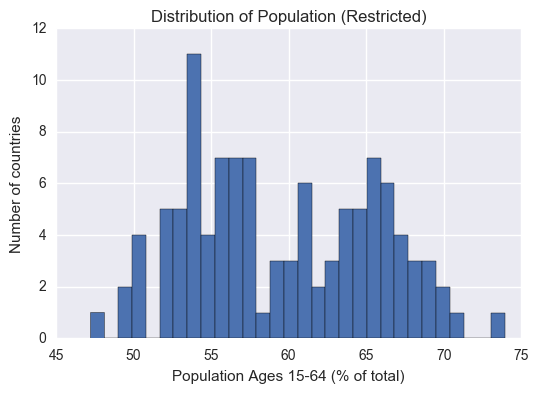

In [22]:
plt.hist(x, bins=30)
plt.xlabel("Population Ages 15-64 (% of total)")
plt.ylabel("Number of countries")
plt.title("Distribution of Population (Restricted)")
plt.savefig("gdp5000_population_hist.png", bbox_inches = "tight")
plt.show()

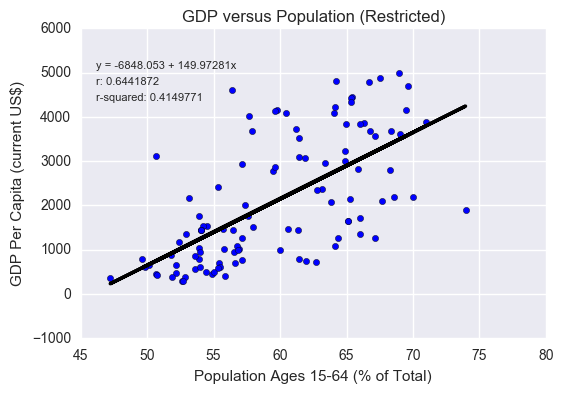

In [23]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
a, b = np.polyfit(x,y, deg=1)
k = lambda x: slope * x + intercept
plt.scatter(x,y)
plt.plot(x,k(x),lw=2.5,c="k")
plt.title("GDP versus Population (Restricted)")
plt.xlabel("Population Ages 15-64 (% of Total)")
plt.ylabel("GDP Per Capita (current US$)")
plt.text(0.15, 0.8, "y = " + str(intercept)[0:9] + " + " + str(slope)[0:9] + "x", fontsize=8, transform=plt.gcf().transFigure)
plt.text(0.15,0.76, "r: " + str(r_value)[0:9],fontsize=8, transform=plt.gcf().transFigure)
plt.text(0.15,0.72, "r-squared: " + str(r_value * r_value)[0:9],fontsize=8, transform=plt.gcf().transFigure)
plt.savefig("gdp5000_population_teens.png",bbox_inches="tight")
plt.show()

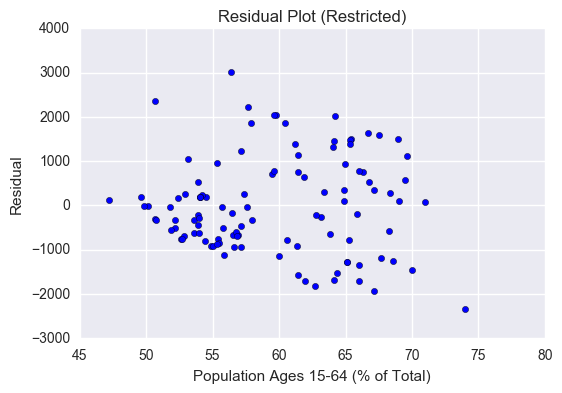

In [24]:
resid = y - k(x)
plt.scatter(x,resid)
plt.xlabel("Population Ages 15-64 (% of Total)")
plt.ylabel("Residual")
plt.title("Residual Plot (Restricted)")
plt.savefig("gdp5000_population_teens_resid.png", bbox_inches="tight")
plt.show()

In [25]:
merged.to_csv("dataset_pop_gdp.csv", index=False,encoding="utf-8")